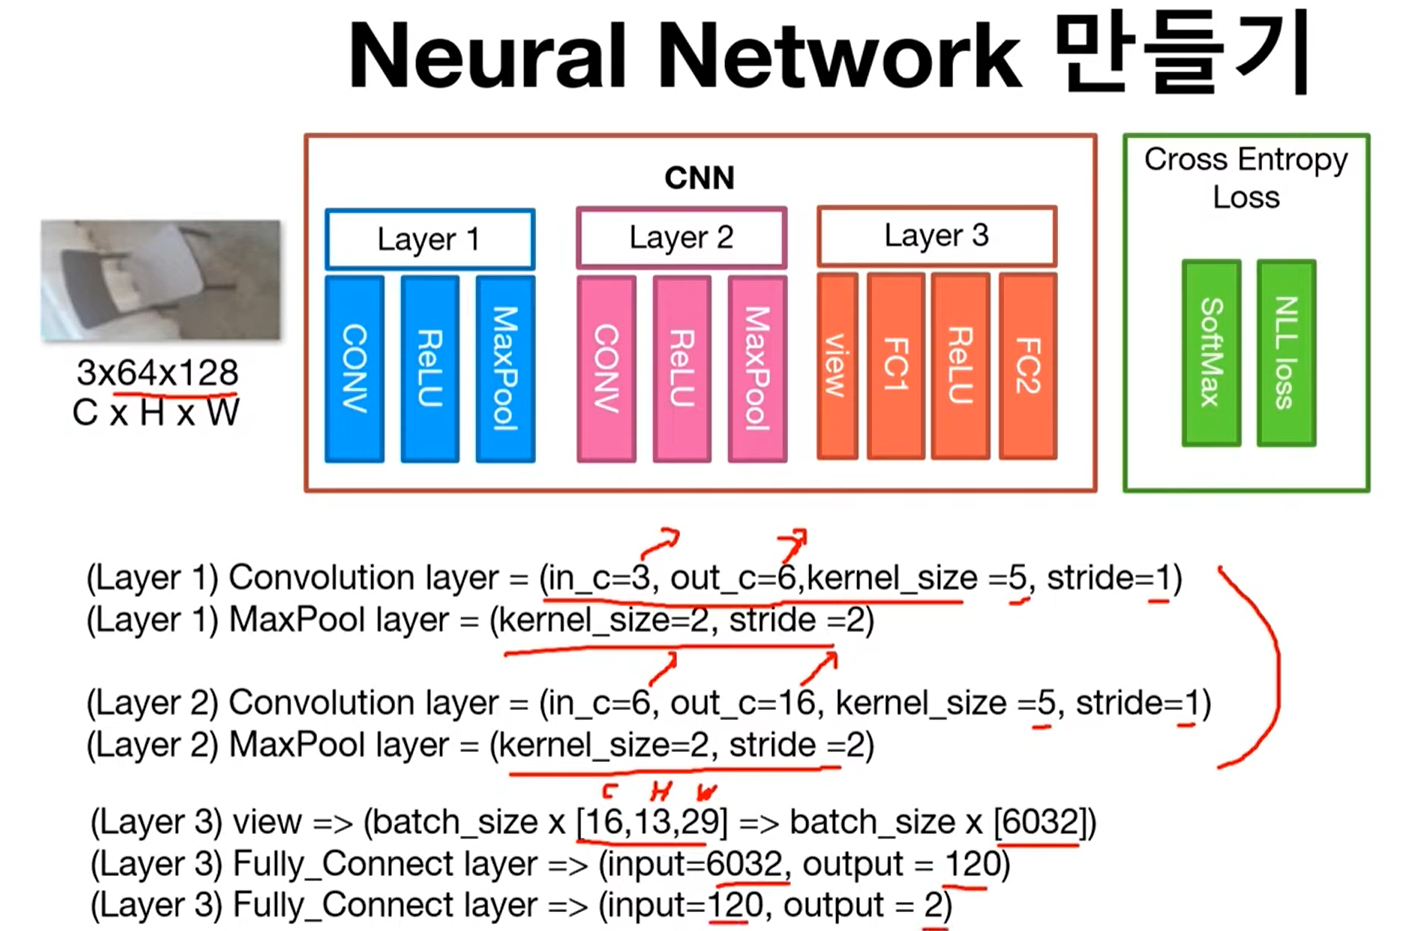

In [45]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision
import torchvision.transforms as transforms

In [46]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device =='cuda':
    torch.cuda.manual_seed_all(777)

In [47]:
trans = transforms.Compose([
    transforms.ToTensor()
])

train_data = torchvision.datasets.ImageFolder(root='C:/Users/jys74/Desktop/modeep/train_data', transform=trans)

In [48]:
data_loader = DataLoader(dataset = train_data, batch_size = 8, shuffle = True, num_workers=2)

In [49]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        self.layer3 = nn.Sequential(
            nn.Linear(16*13*29, 120),
            nn.ReLU(),
            nn.Linear(120,2)
        )
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.shape[0], -1)
        out = self.layer3(out)
        return out

In [50]:
#testing 
net = CNN().to(device)
test_input = (torch.Tensor(3,3,64,128)).to(device)
test_out = net(test_input)

In [51]:
optimizer = optim.Adam(net.parameters(), lr=0.00005)
loss_func = nn.CrossEntropyLoss().to(device)

In [52]:
total_batch = len(data_loader)

epochs = 8
for epoch in range(epochs):
    avg_cost = 0.0
    for num, data in enumerate(data_loader):
        imgs, labels = data
        imgs = imgs.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        out = net(imgs)
        loss = loss_func(out, labels)
        loss.backward()
        optimizer.step()
        
        avg_cost += loss / total_batch
        
    print('[Epoch:{}] cost = {}'.format(epoch+1, avg_cost))
print('Learning Finished!') 

[Epoch:1] cost = 0.6534522771835327
[Epoch:2] cost = 0.49177515506744385
[Epoch:3] cost = 0.23028402030467987
[Epoch:4] cost = 0.0674123466014862
[Epoch:5] cost = 0.02610119618475437
[Epoch:6] cost = 0.013721407391130924
[Epoch:7] cost = 0.008546949364244938
[Epoch:8] cost = 0.005996482912451029
Learning Finished!


In [53]:
torch.save(net.state_dict(), "C:/Users/jys74/Desktop/modeep/modudeep/model.pth")

In [54]:
new_net = CNN().to(device)

In [55]:
new_net.load_state_dict(torch.load("C:/Users/jys74/Desktop/modeep/modudeep/model.pth"))

<All keys matched successfully>

In [56]:
print(net.layer1[0])
print(new_net.layer1[0])

print(net.layer1[0].weight[0][0][0])
print(new_net.layer1[0].weight[0][0][0])

net.layer1[0].weight[0] == new_net.layer1[0].weight[0]

Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
tensor([-0.0910,  0.0035, -0.0169, -0.0210,  0.0933], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor([-0.0910,  0.0035, -0.0169, -0.0210,  0.0933], device='cuda:0',
       grad_fn=<SelectBackward0>)


tensor([[[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]],

        [[True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True],
         [True, True, True, True, True]]], device='cuda:0')

In [57]:
trans=torchvision.transforms.Compose([
    transforms.Resize((64,128)),
    transforms.ToTensor()
])
test_data = torchvision.datasets.ImageFolder(root='C:/Users/jys74/Desktop/modeep/test_data', transform=trans)

In [58]:
test_set = DataLoader(dataset = test_data, batch_size = len(test_data))

In [59]:
with torch.no_grad():
    for num, data in enumerate(test_set):
        imgs, label = data
        imgs = imgs.to(device)
        label = label.to(device)
        
        prediction = net(imgs)
        
        correct_prediction = torch.argmax(prediction, 1) == label
        
        accuracy = correct_prediction.float().mean()
        print('Accuracy:', accuracy.item())

Accuracy: 1.0
